# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_raw["munResLat"].describe()

,munResLat
count,27027.000000
mean,-10.377988
std,1.372942
min,-13.499760
25%,-11.433870
50%,-10.435950
75%,-8.768890
max,-8.768890


In [5]:
sinasc_raw['faixa_latitude'] = pd.cut(
   sinasc_raw['munResLat'],
   bins=[-float('inf'), -10.5, float('inf')],
   labels=['Abaixo de -10.5', 'Acima de -10.5']
)

In [6]:
resultados = sinasc_raw.groupby('faixa_latitude').agg({
   'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
   'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

resultados.head()

<ipython-input-6-194629404ea0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados = sinasc_raw.groupby('faixa_latitude').agg({


IDADEMAE                                                 \
                     sum       mean min max median       std        var   
faixa_latitude                                                            
Abaixo de -10.5   340143  26.178943  12  53   26.0  6.320385  39.947272   
Acima de -10.5    365094  26.014964  11  52   25.0  6.447663  41.572355   

                QTDFILVIVO                                                  
                       sum      mean  min   max median       std       var  
faixa_latitude                                                              
Abaixo de -10.5    12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727  
Acima de -10.5     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [ ]:
sinasc_raw["munResArea"].describe()

,munResArea
count,27027.000000
mean,14702.799767
std,13706.177751
min,459.978000
25%,3792.998000
50%,6896.648000
75%,34096.394000
max,34096.394000


In [8]:
area_municipio = pd.cut(sinasc_raw["munResArea"],
 bins= [-float('inf'), 3000, float('inf')],
 labels=['Abaixo de 3000', 'Acima de 3000'])

In [15]:
resultados_2 = sinasc_raw.groupby(area_municipio).agg({
                       'CONSULTAS':['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                       'PESO':['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
resultados_2

<ipython-input-15-59ee3dfc4764>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados_2 = sinasc_raw.groupby(area_municipio).agg({


CONSULTAS                                               \
                     sum      mean min max median       std       var   
munResArea                                                              
Abaixo de 3000     19520  3.740180   1   9    4.0  0.607492  0.369046   
Acima de 3000      77142  3.537326   1   9    4.0  0.820967  0.673986   

                    PESO                                              \
                     sum         mean  min   max  median         std   
munResArea                                                             
Abaixo de 3000  16796616  3218.359073  258  5720  3245.0  531.583103   
Acima de 3000   70857126  3249.134538  292  5985  3280.0  547.716582   

                               
                          var  
munResArea                     
Abaixo de 3000  282580.595074  
Acima de 3000   299993.453720

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [17]:
nova_variavel = pd.qcut(sinasc_raw["munResAlt"],2)
nova_variavel

,munResAlt
0,"(153.0, 595.0]"
1,"(153.0, 595.0]"
2,"(153.0, 595.0]"
3,"(153.0, 595.0]"
4,"(153.0, 595.0]"
...,...
27023,"(153.0, 595.0]"
27024,"(153.0, 595.0]"
27025,"(153.0, 595.0]"
27026,"(153.0, 595.0]"


In [18]:
sinasc_raw.groupby(nova_variavel).agg({
    'QTDGESTANT':['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT':['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

<ipython-input-18-634e38d1f51d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby(nova_variavel).agg({


QTDGESTANT                                                  \
                       sum      mean  min   max median       std       var   
munResAlt                                                                    
(84.999, 153.0]    17826.0  1.425738  0.0  52.0    1.0  1.560818  2.436154   
(153.0, 595.0]     15090.0  1.133564  0.0  12.0    1.0  1.223395  1.496696   

                QTDFILMORT                                                  
                       sum      mean  min   max median       std       var  
munResAlt                                                                   
(84.999, 153.0]     3520.0  0.300393  0.0   9.0    0.0  0.641421  0.411421  
(153.0, 595.0]      3123.0  0.236394  0.0  28.0    0.0  0.586806  0.344341

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [19]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

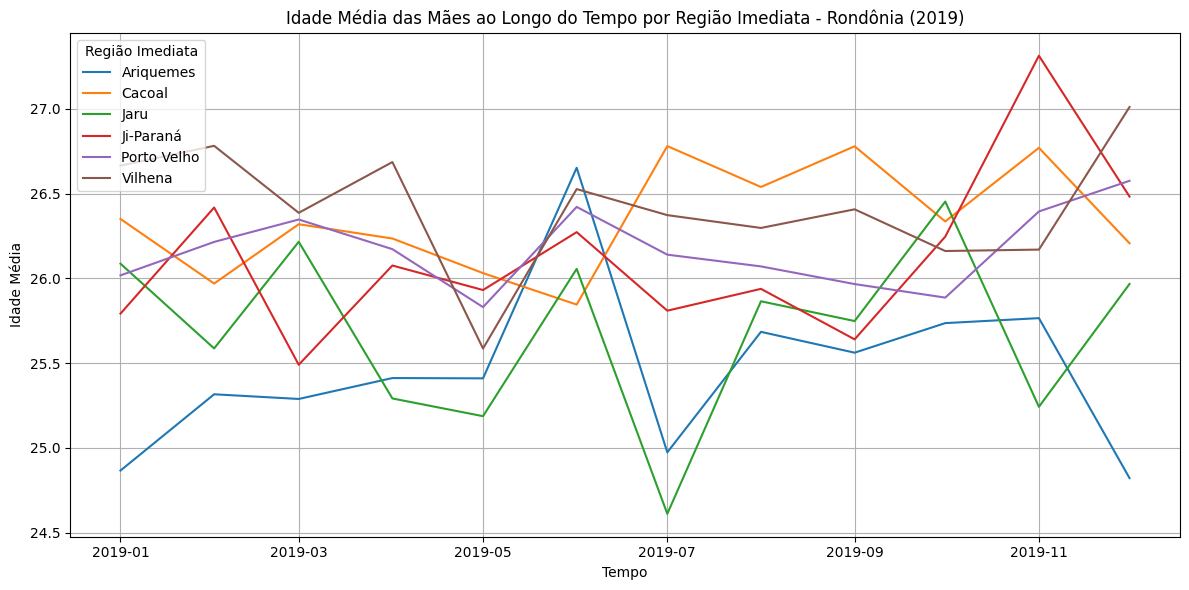

In [22]:
# Adicionando a coluna da região imediata
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

# Convertendo a data de nascimento para formato de data
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

# Criando coluna do mês e ano para análise temporal
sinasc_raw['ano_mes'] = sinasc_raw['DTNASC'].dt.to_period('M')

# Calculando a idade média por região imediata e mês
idade_media = sinasc_raw.groupby(['ano_mes', 'regiao_imediata'])['IDADEMAE'].mean().unstack()
# Plotando o gráfico
plt.figure(figsize=(12, 6))
for regiao in idade_media.columns:
    plt.plot(idade_media.index.to_timestamp(), idade_media[regiao], label=regiao)

plt.title('Idade Média das Mães ao Longo do Tempo por Região Imediata - Rondônia (2019)')
plt.xlabel('Tempo')
plt.ylabel('Idade Média')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [34]:
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,faixa_latitude,regiao_imediata,ano_mes
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Cacoal,2019-02
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Cacoal,2019-02
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Cacoal,2019-02
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Cacoal,2019-03
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Cacoal,2019-03


In [33]:
# URL da página da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"

# Ler todas as tabelas da página
tables = pd.read_html(url)

# Selecionar a tabela correta (neste caso, a primeira)
idh_table = tables[0]

# Ajustar os nomes das colunas conforme necessário
idh_table.columns = ['Posição', 'Município', 'IDH', 'IDH_Renda', 'IDH_Longevidade', 'IDH_Educação']

# Manter apenas as colunas necessárias
idh_table = idh_table[['Posição', 'Município', 'IDH']].copy()

# Remover possíveis linhas com valores faltantes ou não numéricos
idh_table.loc[:, 'IDH'] = pd.to_numeric(idh_table['IDH'], errors='coerce')

# Dropar linhas onde IDH seja NaN
idh_table.dropna(subset=['IDH'], inplace=True)

# Função para mapear o IDH para as faixas
def categorize_idh(idh):
   if idh < 0.500:
       return "Muito Baixo"
   elif idh < 0.600:
       return "Baixo"
   elif idh < 0.700:
       return "Médio"
   elif idh < 0.800:
       return "Alto"
   else:
       return "Muito Alto"

# Aplicar a função à coluna 'IDH'
idh_table.loc[:, 'Faixa_IDH'] = idh_table['IDH'].apply(categorize_idh)

# Exibir o DataFrame com os municípios e suas classificações de IDH
idh_table_classificado = idh_table[['Município', 'IDH', 'Faixa_IDH']]
idh_table_classificado

,Município,IDH,Faixa_IDH
2,Porto Velho,0.736,Alto
3,Vilhena,0.731,Alto
4,Cacoal,0.718,Alto
5,Ji-Paraná,0.714,Alto
6,Pimenta Bueno,0.71,Alto
7,Ariquemes,0.702,Alto
8,Rolim de Moura,0.7,Alto
10,Cerejeiras,0.692,Médio
11,Jaru,0.689,Médio
12,Colorado do Oeste,0.685,Médio


In [40]:
# Certifique-se de que os nomes estão consistentes
sinasc_raw['munResNome'] = sinasc_raw['munResNome'].str.strip()
idh_table_classificado['Município'] = idh_table_classificado['Município'].str.strip()

# Realizar o merge com base no nome do município
sinasc_com_idh = sinasc_raw.merge(idh_table_classificado, left_on='munResNome', right_on='Município', how='right')

avaliacao_idh = sinasc_com_idh.groupby('Faixa_IDH').agg({
    'IDADEMAE': ['mean', 'min', 'max'],
    'QTDFILVIVO': ['mean', 'min', 'max']
})
avaliacao_idh

<ipython-input-40-022b68a89440>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idh_table_classificado['Município'] = idh_table_classificado['Município'].str.strip()


IDADEMAE             QTDFILVIVO           
                mean   min   max       mean  min   max
Faixa_IDH                                             
Alto       26.280332  12.0  47.0   1.033960  0.0  12.0
Baixo      25.269231  13.0  46.0   1.056270  0.0   8.0
Médio      25.848191  11.0  53.0   1.093111  0.0  14.0

<Axes: xlabel='Faixa_IDH'>

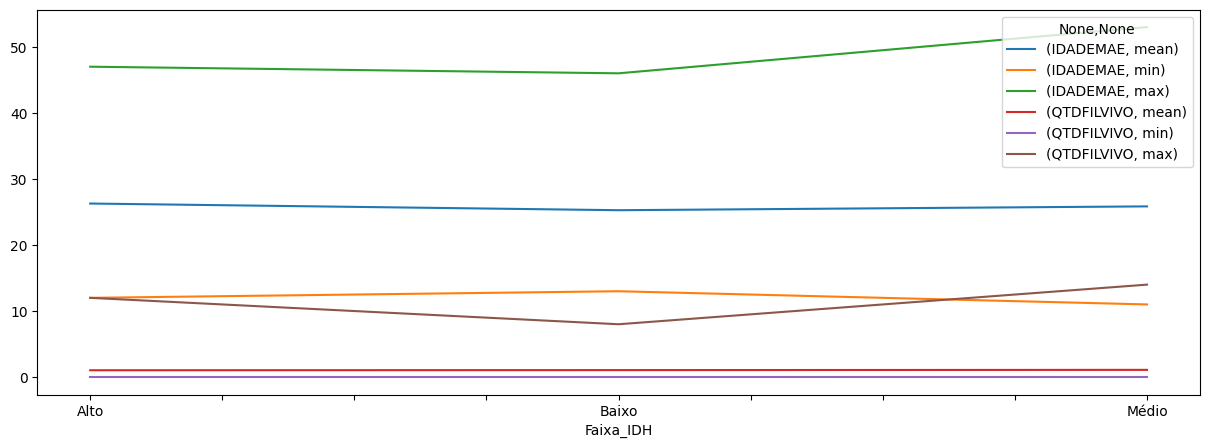

In [68]:
avaliacao_idh.plot(figsize=(15,5))

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [69]:
ifdm_table = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM")[0]
ifdm_table.columns = ["Posição",	"Município", "IFDM Consolidado"]

In [55]:
# Remover possíveis linhas com valores faltantes ou não numéricos
ifdm_table.loc[:, 'IFDM Consolidado'] = pd.to_numeric(ifdm_table['IFDM Consolidado'], errors='coerce')
ifdm_table.dropna(subset=['IFDM Consolidado'], inplace=True)
ifdm_table

,Posição,Município,IFDM Consolidado
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117
7,6º,Cacoal,0.7111
8,7º,Santa Luzia d'Oeste,0.685
9,8º,Rolim de Moura,0.6785
10,9º,Chupinguaia,0.6766
11,10º,São Miguel do Guaporé,0.6699


In [63]:
def categorize_ifdm(ifdm):
   if ifdm < 0.600:
       return "Regular"
   elif ifdm < 0.700:
       return "Médio"
   elif ifdm < 0.800:
       return "Alto"
   else:
       return "Muito Alto"

# Aplicar a função à coluna 'IFDM'
ifdm_table.loc[:, 'Faixa_IFDM'] = ifdm_table['IFDM Consolidado'].apply(categorize_ifdm)

# Exibir o DataFrame com os municípios e suas classificações de IDH
ifdm_table_classificado = ifdm_table[["Município", "IFDM Consolidado", 'Faixa_IFDM']]
ifdm_table_classificado

,Município,IFDM Consolidado,Faixa_IFDM
2,Ariquemes,0.7746,Alto
3,Vilhena,0.7465,Alto
4,Pimenta Bueno,0.7383,Alto
5,Porto Velho,0.7257,Alto
6,Ji-Paraná,0.7117,Alto
7,Cacoal,0.7111,Alto
8,Santa Luzia d'Oeste,0.685,Médio
9,Rolim de Moura,0.6785,Médio
10,Chupinguaia,0.6766,Médio
11,São Miguel do Guaporé,0.6699,Médio


In [66]:
sinasc_raw['munResNome'] = sinasc_raw['munResNome'].str.strip()
ifdm_table_classificado['Município'] = ifdm_table_classificado['Município'].str.strip()

sinasc_com_ifdm = sinasc_raw.merge(ifdm_table_classificado, left_on='munResNome', right_on='Município', how='right')

avaliacao_ifdm = sinasc_com_ifdm.groupby('Faixa_IFDM').agg({
    'PESO': ['mean', 'min', 'max'],
    'QTDFILVIVO': ['mean', 'min', 'max']
})
avaliacao_ifdm

<ipython-input-66-ad408e3c39d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ifdm_table_classificado['Município'] = ifdm_table_classificado['Município'].str.strip()


PESO                QTDFILVIVO           
                   mean    min     max       mean  min   max
Faixa_IFDM                                                  
Alto        3246.914553  292.0  5480.0   1.044870  0.0  12.0
Médio       3235.351219  258.0  5720.0   0.989280  0.0  10.0
Regular     3255.036835  425.0  5070.0   1.172404  0.0  14.0

<Axes: xlabel='Faixa_IFDM'>

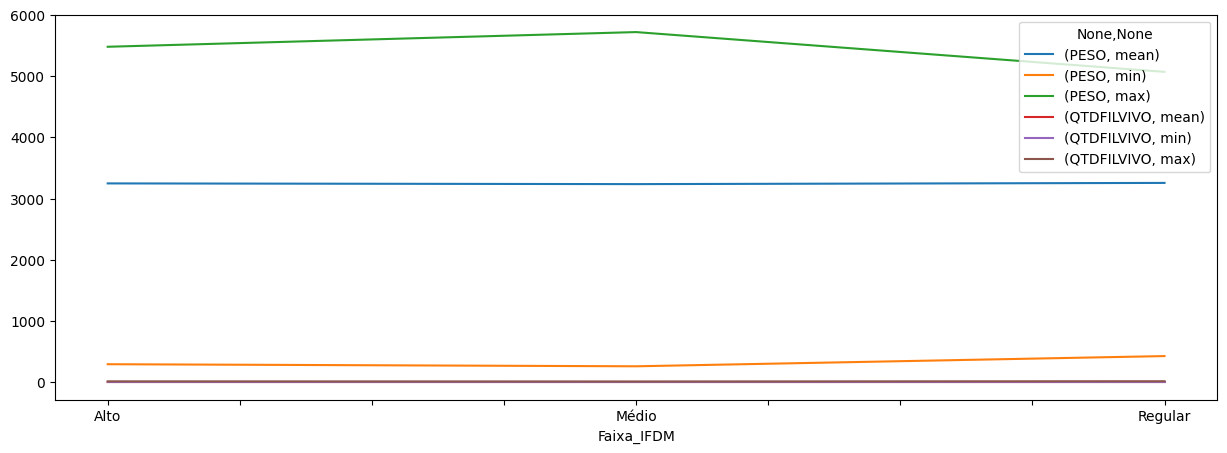

In [67]:
avaliacao_ifdm.plot(figsize=(15,5))

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [88]:
# URL da página da Wikipedia
url_pib = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"

# Ler todas as tabelas da página
tables_pib = pd.read_html(url_pib)

# Lista para armazenar os DataFrames processados
pib_frames = []

# Iterar pelas tabelas extraídas
for table in tables_pib:
    try:

        table.columns = ['Posição', 'Mudança', 'Município', 'PIB', 'Alteração']

        table = table[['Município', 'PIB']].copy()

        table['PIB'] = table['PIB'].str.replace('.', '').str.replace(',', '.').str.replace(' ', '')

        table['PIB'] = pd.to_numeric(table['PIB'], errors='coerce')

        pib_frames.append(table)
    except Exception as e:
        print(f"Tabela ignorada devido a erro: {e}")

pib_table = pd.concat(pib_frames, ignore_index=True)

pib_table.dropna(subset=['PIB'], inplace=True)

def categorize_pib(pib):
    if pib < 100_000:
        return "Até 100 Milhões"
    elif pib < 200_000:
        return "Acima de 100 Milhões"
    elif pib < 300_000:
        return "Acima de 200 Milhões"
    elif pib < 500_000:
        return "Acima de 300 Milhões"
    elif pib < 1_000_000:
        return "Acima de 500 Milhões"
    else:
        return "Acima de 1 Bilhão"

# Aplicar a função à coluna 'PIB'
pib_table['Faixa_PIB'] = pib_table['PIB'].apply(categorize_pib)

# Certifique-se de que os nomes estão consistentes
sinasc_raw['munResNome'] = sinasc_raw['munResNome'].str.strip()
pib_table['Município'] = pib_table['Município'].str.strip()

# Realizar o merge com base no nome do município
sinasc_com_pib = sinasc_raw.merge(pib_table, left_on='munResNome', right_on='Município', how='right')

# Agrupar e calcular as estatísticas por faixa de PIB
avaliacao_pib = sinasc_com_pib.groupby('Faixa_PIB').agg({
    'IDADEMAE': ['mean', 'min', 'max'],
    'QTDFILVIVO': ['mean', 'min', 'max']
})

avaliacao_pib

Tabela ignorada devido a erro: Length mismatch: Expected axis has 3 elements, new values have 5 elements
Tabela ignorada devido a erro: Length mismatch: Expected axis has 2 elements, new values have 5 elements
Tabela ignorada devido a erro: Length mismatch: Expected axis has 2 elements, new values have 5 elements


IDADEMAE             QTDFILVIVO           
                           mean   min   max       mean  min   max
Faixa_PIB                                                        
Acima de 1 Bilhão     26.265562  12.0  47.0   1.026435  0.0  12.0
Acima de 100 Milhões  25.638424  12.0  52.0   0.992320  0.0  14.0
Acima de 200 Milhões  25.146435  13.0  41.0   1.010526  0.0   7.0
Acima de 300 Milhões  25.706070  11.0  47.0   1.062097  0.0   8.0
Acima de 500 Milhões  25.785927  13.0  53.0   1.228385  0.0  11.0
Até 100 Milhões       26.519894  14.0  41.0   1.032258  0.0   6.0

<Axes: xlabel='Faixa_PIB'>

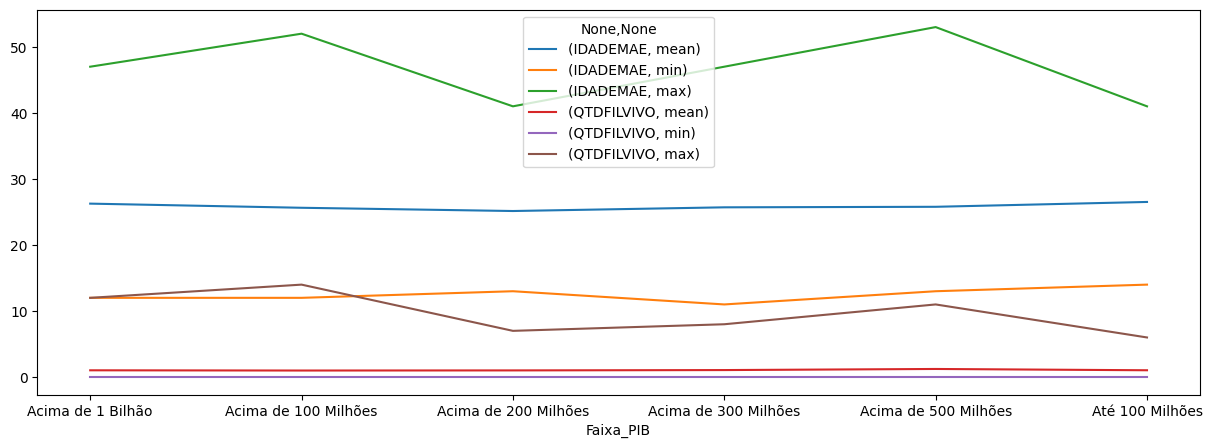

In [89]:
avaliacao_pib.plot(figsize=(15,5))

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

RESPOSTAS:

* Descobri que quanto maior o IDH ou PIB da cidade, o número de consultas é menor, minha teoria é que provavelmente isso se deve as melhores condições financeiras, acarretando em acompanhamentos pelo sistema de saúde privado.

* Outro ponto notado é que o PIB aparentemente interfere no peso das crianças, onde cidades com PIB mais alto tendem a ter mães com crianças em pesos maiores.


* Com índices melhores de desenvolvimento, seja ele municipal ou regional, as taxas de filhos vivos aumentam junto.
